In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
df <- read.table("ratings.csv", header=FALSE, sep=",")
df

V1,V2,V3,V4
1,122,5,838985046
1,185,5,838983525
1,231,5,838983392
1,292,5,838983421
1,316,5,838983392
1,329,5,838983392
1,355,5,838984474
1,356,5,838983653
1,362,5,838984885
1,364,5,838983707


In [3]:
tail(df)

,V1,V2,V3,V4
10000049,71567,2028,5,912580344
10000050,71567,2107,1,912580553
10000051,71567,2126,2,912649143
10000052,71567,2294,5,912577968
10000053,71567,2338,2,912578016
10000054,71567,2384,2,912578173


In [4]:
getwd()

[1] "/Users/detcitty/Desktop/social-data/msd2017/homework/homework_1/problem_3"

In [5]:
colnames(df) <- c("UserID", "MovieID", "Rating", "Timestamp")

In [6]:
head(df)

UserID,MovieID,Rating,Timestamp
1,122,5,838985046
1,185,5,838983525
1,231,5,838983392
1,292,5,838983421
1,316,5,838983392
1,329,5,838983392


In [7]:
df %>%
    group_by(MovieID) %>%
        summarize(sum(UserID))

MovieID,sum(UserID)
1,939472812
2,431568886
3,275077011
4,61622373
5,249877561
6,486316398
7,285388148
8,31161893
9,88312366
10,607593399


In [8]:
new <- count(df, UserID)
#new$n
#new
#plot(new$n, new$UserID)
colnames(new) <- c("UserID", "Count")
#arrange(new, asc(Count))
filter(new, Count > 10 & Count < 30)

UserID,Count
1,22
2,20
9,24
28,28
33,26
46,29
48,21
59,20
61,27
62,28


In [9]:
?select()


In [10]:
?desc

x axis: top movies from 0 to N, with n being the number of movies

y axis: percentage of people who rated the movie, 



In [11]:
movies <- read_delim("movies.tsv", delim="\t", quote="", escape_backslash = FALSE, col_names=c("MovieID", "Name", "Genre"))
movies

Parsed with column specification:
cols(
  MovieID = col_integer(),
  Name = col_character(),
  Genre = col_character()
)


MovieID,Name,Genre
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action
10,GoldenEye (1995),Action|Adventure|Thriller


In [12]:
getwd()

[1] "/Users/detcitty/Desktop/social-data/msd2017/homework/homework_1/problem_3"

In [13]:
list.files(".")

[1] "allbut.pl"             "download_movielens.sh" "eccentricity.R"       
 [4] "header_ratings.csv"    "ml-10M100K"            "movielens_10M.zip"    
 [7] "movies.dat"            "movies.tsv"            "problem3.ipynb"       
[10] "r1.test"               "r1.train"              "r2.test"              
[13] "r2.train"              "r3.test"               "r3.train"             
[16] "r4.test"               "r4.train"              "r5.test"              
[19] "r5.train"              "ra.test"               "ra.train"             
[22] "ratings.csv"           "ratings.dat"           "rb.test"              
[25] "rb.train"              "README.html"           "README.md"            
[28] "split_ratings.sh"      "tags.dat"

In [14]:
nextd <- count(df, MovieID)
popularMovies <- arrange(nextd, desc(n))
colnames(popularMovies) <- c("MovieID", "Count")


In [15]:
d <- left_join(movies, popularMovies, by="MovieID") %>%
    arrange(desc(Count)) 
#d
#str(d)

#is.na(d)
d[is.na(d)] <- 0
#d

In [16]:
d <- mutate(d, prop=Count/sum(Count))
d <- mutate(d, cum_sum= cumsum(prop))

In [17]:
?left_join

In [18]:
?filter

In [19]:
d

MovieID,Name,Genre,Count,prop,cum_sum
296,Pulp Fiction (1994),Comedy|Crime|Drama,34864,0.003486381,0.003486381
356,Forrest Gump (1994),Comedy|Drama|Romance|War,34457,0.003445681,0.006932063
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,33668,0.003366782,0.010298844
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,32631,0.003263082,0.013561927
318,"Shawshank Redemption, The (1994)",Drama,31126,0.003112583,0.016674510
110,Braveheart (1995),Action|Drama|War,29154,0.002915384,0.019589894
457,"Fugitive, The (1993)",Thriller,28951,0.002895084,0.022484979
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,28948,0.002894784,0.025379763
260,Star Wars: Episode IV - A New Hope (a.k.a. Star Wars) (1977),Action|Adventure|Sci-Fi,28566,0.002856585,0.028236348
150,Apollo 13 (1995),Adventure|Drama,27035,0.002703485,0.030939833


In [20]:
rows <- nrow(d)

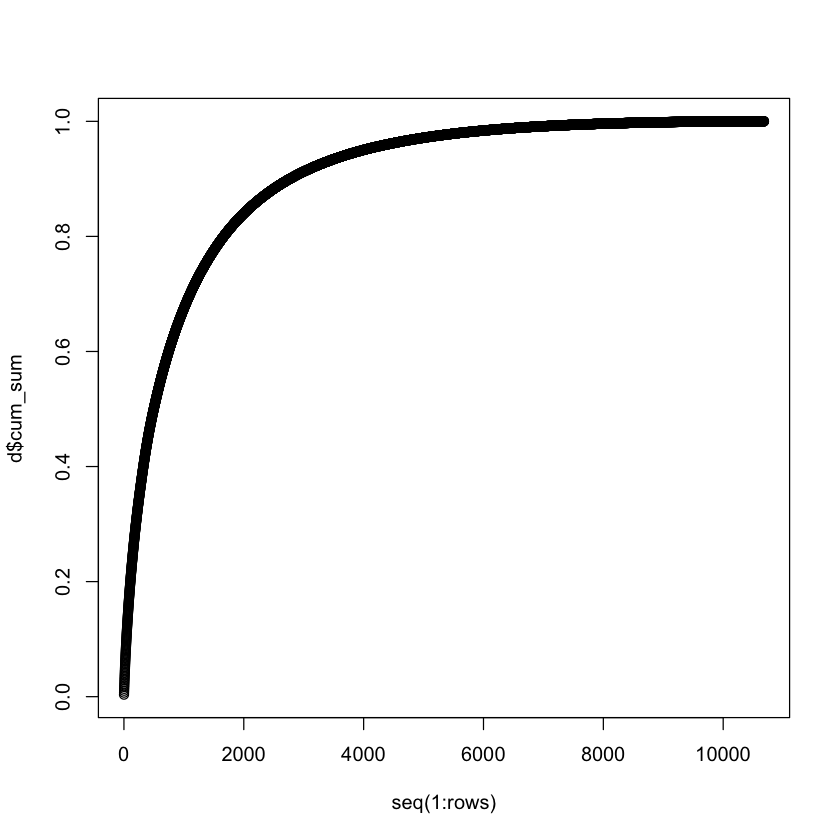

In [21]:
plot(seq(1:rows), d$cum_sum)